In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'vegetable-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1817999%2F2965251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240416%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240416T164545Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D726e7d3a5ee86aeef56f5f3b4a49cbaaa7e6e8f15ca8b57a9370e1eb64a196fcbb89423080e94fa1bd0ade5cbbd5804ea98f7c431e9cf8a4760f7a720542479500dfb668fb4d7b69f9791cfc5412dc297686c3107d6db726f424ba68e292e3e641919e1210ee9879a9172f46ff8735c693bef3587224c003cac2c72314966019ea38d0657796f05e38c5274f07d91b7b2dffc4e0b51e3e554de286e51287910bfce8a8fb4cf0b2eba7821828c5f468603f6fd2e5837e8067b2207cbda446d4d65c2da139cc95d1f1a778216fc1ccb9597075ab43cb296efe358059a94992bef00f12a473a75a6c16c02b973d14c0bbf1abc038b9d38596bd248d85c807a07d34'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 560031432 bytes downloaded
Downloaded and uncompressed: vegetable-image-dataset
Data source import complete.


In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
import time
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Constants
DATA_DIRECTORY = '/kaggle/input/vegetable-image-dataset/Vegetable Images'

In [4]:
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also u

Epoch 1/10
----------


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train Loss: 2.5609 Acc: 0.1344
validation Loss: 2.0718 Acc: 0.2737
Epoch 2/10
----------
train Loss: 1.8712 Acc: 0.3275
validation Loss: 1.6551 Acc: 0.4087
Epoch 3/10
----------
train Loss: 1.5811 Acc: 0.4364
validation Loss: 1.2684 Acc: 0.5417
Epoch 4/10
----------
train Loss: 1.4896 Acc: 0.4719
validation Loss: 1.2197 Acc: 0.5683
Epoch 5/10
----------
train Loss: 1.4197 Acc: 0.5109
validation Loss: 1.2561 Acc: 0.5473
Epoch 6/10
----------
train Loss: 1.2903 Acc: 0.5605
validation Loss: 1.1501 Acc: 0.5897
Epoch 7/10
----------
train Loss: 1.1597 Acc: 0.6043
validation Loss: 0.8113 Acc: 0.7277
Epoch 8/10
----------
train Loss: 1.0528 Acc: 0.6425
validation Loss: 0.8587 Acc: 0.6940
Epoch 9/10
----------
train Loss: 0.9800 Acc: 0.6788
validation Loss: 0.6952 Acc: 0.7623
Epoch 10/10
----------
train Loss: 0.9291 Acc: 0.6961
validation Loss: 0.5851 Acc: 0.8160
Best validation Acc: 0.816000


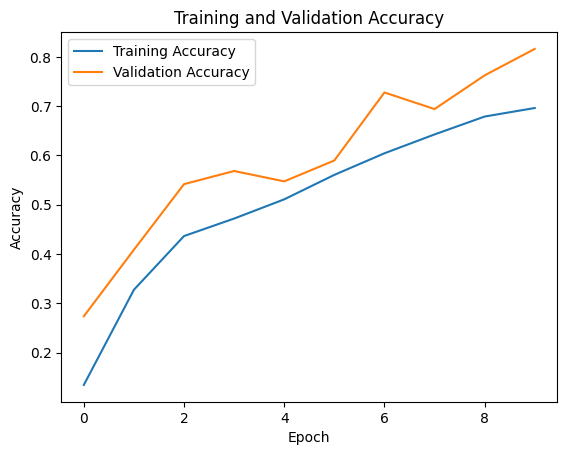

Test Accuracy: 0.8180
Precision: 0.8261
Recall: 0.8180
F1 Score: 0.8190
Mean Loss: 0.5794
              precision    recall  f1-score   support

        Bean       0.66      0.72      0.69       200
Bitter_Gourd       0.83      0.85      0.84       200
Bottle_Gourd       0.87      0.79      0.82       200
     Brinjal       0.67      0.77      0.72       200
    Broccoli       0.76      0.79      0.77       200
     Cabbage       0.68      0.84      0.75       200
    Capsicum       0.95      0.89      0.91       200
      Carrot       0.94      0.97      0.96       200
 Cauliflower       0.97      0.77      0.86       200
    Cucumber       0.72      0.60      0.66       200
      Papaya       0.70      0.76      0.73       200
      Potato       0.96      0.94      0.95       200
     Pumpkin       0.94      0.77      0.84       200
      Radish       0.90      0.99      0.95       200
      Tomato       0.85      0.82      0.84       200

    accuracy                           0.82 

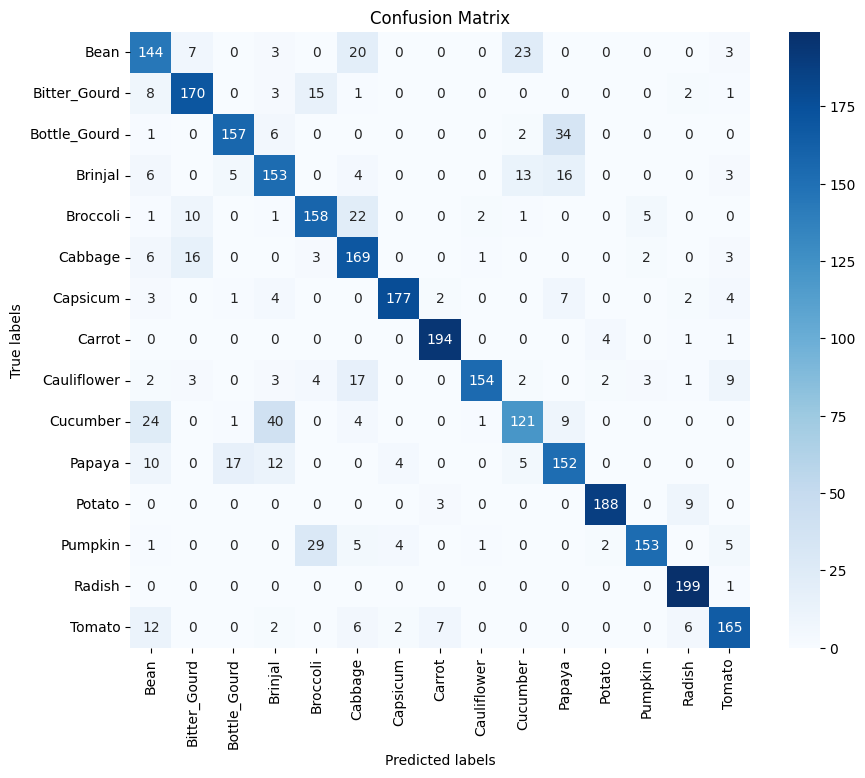

In [5]:
# Constants
BATCH_SIZE = 64
NUM_WORKERS = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

def load_datasets():
    return {x: datasets.ImageFolder(os.path.join(DATA_DIRECTORY, x), data_transforms[x]) for x in ['train', 'validation', 'test']}

def create_dataloaders(image_datasets):
    return {x: DataLoader(image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS) for x in ['train', 'validation', 'test']}

def setup_model():
    model = models.vgg16(pretrained=True)
    for param in model.parameters():
        param.requires_grad = True  # Set requires_grad to True for fine-tuning
    num_output_classes = len(image_datasets['train'].classes)
    model.classifier[6] = nn.Sequential(
        nn.Linear(4096, 512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512, num_output_classes)  # Adding a new layer for classification
    )
    return model.to(device)

def train_model(model, criterion, optimizer, num_epochs=10):
    best_acc = 0.0

    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for batch_idx, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            if phase == 'train':
                train_acc_history.append(epoch_acc.item())
            else:
                val_acc_history.append(epoch_acc.item())

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

        if val_acc_history[-1] > best_acc:
            best_acc = val_acc_history[-1]

    print('Best validation Acc: {:4f}'.format(best_acc))

    plt.plot(range(len(train_acc_history)), train_acc_history, label='Training Accuracy')
    plt.plot(range(len(val_acc_history)), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    losses = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            loss = criterion(outputs, labels)
            losses.append(loss.item())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    mean_loss = np.mean(losses)

    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Mean Loss: {mean_loss:.4f}')

    print(classification_report(y_true, y_pred, target_names=image_datasets['test'].classes))

    return y_true, y_pred

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

image_datasets = load_datasets()
dataloaders = create_dataloaders(image_datasets)
model = setup_model()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, criterion, optimizer, num_epochs=10)

y_true, y_pred = evaluate_model(model, dataloaders['test'])

conf_matrix = confusion_matrix(y_true, y_pred)
class_names = image_datasets['test'].classes
plot_confusion_matrix(conf_matrix, class_names)

In [ ]:
# Constants
BATCH_SIZE = 64
NUM_WORKERS = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

def load_datasets():
    return {x: datasets.ImageFolder(os.path.join(DATA_DIRECTORY, x), data_transforms[x]) for x in ['train', 'validation', 'test']}

def create_dataloaders(image_datasets):
    return {x: DataLoader(image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS) for x in ['train', 'validation', 'test']}

def setup_model():
    model = models.vgg16(pretrained=False)
    for param in model.parameters():
        param.requires_grad = True  # Set requires_grad to True for fine-tuning
    num_output_classes = len(image_datasets['train'].classes)
    model.classifier[6] = nn.Sequential(
        nn.Linear(4096, 512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512, num_output_classes)  # Adding a new layer for classification
    )
    return model.to(device)

def train_model(model, criterion, optimizer, num_epochs=10):
    best_acc = 0.0

    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for batch_idx, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            if phase == 'train':
                train_acc_history.append(epoch_acc.item())
            else:
                val_acc_history.append(epoch_acc.item())

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

        if val_acc_history[-1] > best_acc:
            best_acc = val_acc_history[-1]

    print('Best validation Acc: {:4f}'.format(best_acc))

    plt.plot(range(len(train_acc_history)), train_acc_history, label='Training Accuracy')
    plt.plot(range(len(val_acc_history)), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    losses = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            loss = criterion(outputs, labels)
            losses.append(loss.item())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    mean_loss = np.mean(losses)

    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Mean Loss: {mean_loss:.4f}')

    print(classification_report(y_true, y_pred, target_names=image_datasets['test'].classes))

    return y_true, y_pred

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

image_datasets = load_datasets()
dataloaders = create_dataloaders(image_datasets)
model = setup_model()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, criterion, optimizer, num_epochs=10)

y_true, y_pred = evaluate_model(model, dataloaders['test'])

conf_matrix = confusion_matrix(y_true, y_pred)
class_names = image_datasets['test'].classes
plot_confusion_matrix(conf_matrix, class_names)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/10
----------


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train Loss: 3.0788 Acc: 0.0649
validation Loss: 2.7082 Acc: 0.0620
Epoch 2/10
----------


In [ ]:
def train(num_epochs, model, train_loader, criterion, optimizer):

    ######## Write your code here ##############
    ############ Define the training loop here ###########
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("Device: {}".format(device))
    model.to(device)

    total_steps = len(train_loader)
    losses = 0
    train_loss = []
    train_accuracy = []

    for epoch in range(num_epochs):

        losses = 0
        total = 0
        correct = 0

        for i, data in enumerate(train_loader):
            images, labels = data[0].to(device), data[1].to(device)
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            losses += loss.item()

            # Backprop and optimisation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Train accuracy
            total += labels.size(0)
            _,predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

        mean_loss_epoch = losses/total_steps
        print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                .format(epoch + 1, num_epochs, mean_loss_epoch,
                    (correct / total) * 100))


        train_loss.append(mean_loss_epoch)
        train_accuracy.append((correct / total) * 100)

    return train_loss, train_accuracy, model

In [ ]:
############### Write your code here ##############
############ Define the dictionaries and set the values for number of epochs and batch size ############
train_loss_hyper_paramaters = {}
train_acc_hyper_paramaters = {}
hyper_parameters= {"batch_size":[8, 16, 32, 64, 128]}
num_epochs = 10
learning_rate = 0.001

for batch_size in hyper_parameters["batch_size"]:
    print(f'Results of the batch size = {batch_size}')
    image_datasets = load_datasets()
    dataloaders = create_dataloaders(image_datasets, batch_size)
    train_loader, test_loader = dataloaders['train'], dataloaders['test']

    ############### Define model, criterion, optimizer, and learning rate scheduler here ##############
    model = setup_model()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    ############ Call the train function ###########
    train_loss, train_accuracy, model = train(num_epochs, model, train_loader, criterion, optimizer)

    ############ Store train_loss, and train_accuracy in the defined dictionaries ###########

    train_loss_hyper_paramaters[f"b{batch_size}"] = train_loss
    train_acc_hyper_paramaters[f"b{batch_size}"] = train_accuracy



Results of the batch size = 8
Device: cuda:0
Epoch [1/10], Loss: 2.3666, Accuracy: 14.43%
Epoch [2/10], Loss: 2.1465, Accuracy: 22.97%
Epoch [3/10], Loss: 1.9873, Accuracy: 28.46%
Epoch [4/10], Loss: 1.9549, Accuracy: 30.04%
Epoch [5/10], Loss: 1.7955, Accuracy: 35.83%
Epoch [6/10], Loss: 1.9503, Accuracy: 32.59%
Epoch [7/10], Loss: 1.8371, Accuracy: 35.21%
Epoch [8/10], Loss: 1.8189, Accuracy: 36.71%
Epoch [9/10], Loss: 1.7958, Accuracy: 37.27%
Epoch [10/10], Loss: 1.7828, Accuracy: 37.21%
Results of the batch size = 16
Device: cuda:0
Epoch [1/10], Loss: 2.2024, Accuracy: 19.35%
Epoch [2/10], Loss: 1.9094, Accuracy: 29.53%
Epoch [3/10], Loss: 1.8208, Accuracy: 34.11%
Epoch [4/10], Loss: 1.7290, Accuracy: 39.75%
Epoch [5/10], Loss: 1.6586, Accuracy: 43.22%
Epoch [6/10], Loss: 1.6259, Accuracy: 44.17%
Epoch [7/10], Loss: 1.6352, Accuracy: 44.73%
Epoch [8/10], Loss: 1.5917, Accuracy: 45.84%
Epoch [9/10], Loss: 1.5672, Accuracy: 46.87%
Epoch [10/10], Loss: 1.5495, Accuracy: 47.31%
Results

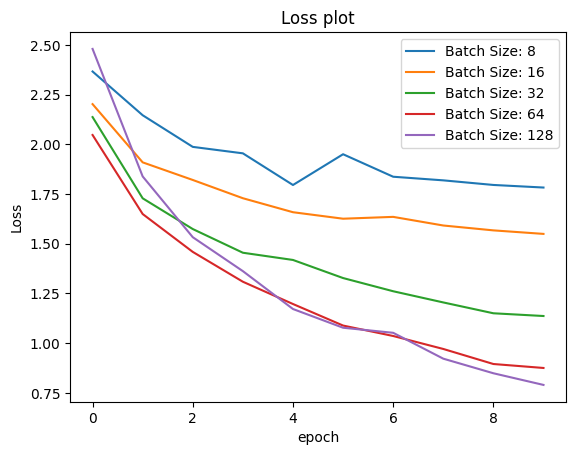

In [ ]:
####### plot the the training loss here #########

epochs = [i for i in range(num_epochs)]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

for batch_size in hyper_parameters["batch_size"]:
    plt.plot(epochs,train_loss_hyper_paramaters[f'b{batch_size}'],label=f'Batch Size: {batch_size}')

plt.legend()

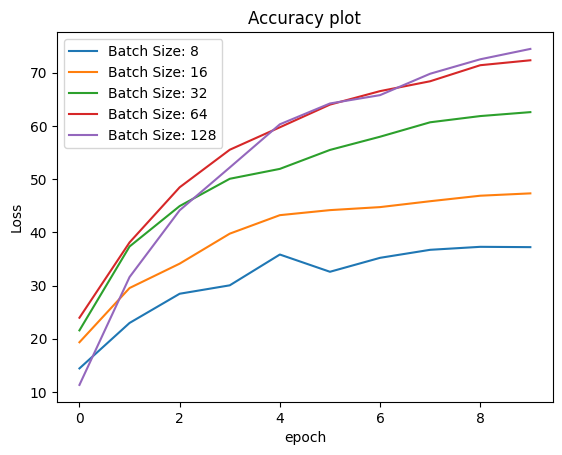

In [ ]:
####### plot the the training accuracies here #########

epochs = [i for i in range(num_epochs)]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Accuracy plot')

for batch_size in hyper_parameters["batch_size"]:
    plt.plot(epochs,train_acc_hyper_paramaters[f'b{batch_size}'],label=f'Batch Size: {batch_size}')

plt.legend()

In [ ]:
############### Write your code here ##############
############ Define the dictionaries and set the values for number of epochs and batch size ############
train_loss_hyper_paramaters = {}
train_acc_hyper_paramaters = {}
hyper_parameters= {"batch_size":[8, 16, 32, 64, 128]}
num_epochs = 10
learning_rate = 0.0001

for batch_size in hyper_parameters["batch_size"]:
    print(f'Results of the batch size = {batch_size}')
    image_datasets = load_datasets()
    dataloaders = create_dataloaders(image_datasets, batch_size)
    train_loader, test_loader = dataloaders['train'], dataloaders['test']

    ############### Define model, criterion, optimizer, and learning rate scheduler here ##############
    model = setup_model()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    ############ Call the train function ###########
    train_loss, train_accuracy, model = train(num_epochs, model, train_loader, criterion, optimizer)

    ############ Store train_loss, and train_accuracy in the defined dictionaries ###########

    train_loss_hyper_paramaters[f"b{batch_size}"] = train_loss
    train_acc_hyper_paramaters[f"b{batch_size}"] = train_accuracy



Results of the batch size = 8


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Device: cuda:0


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/10], Loss: 1.9040, Accuracy: 31.79%
Epoch [2/10], Loss: 1.2004, Accuracy: 58.83%
Epoch [3/10], Loss: 0.8484, Accuracy: 72.23%
Epoch [4/10], Loss: 0.6674, Accuracy: 78.31%
Epoch [5/10], Loss: 0.5561, Accuracy: 83.25%
Epoch [6/10], Loss: 0.4821, Accuracy: 85.11%
Epoch [7/10], Loss: 0.4349, Accuracy: 86.85%
Epoch [8/10], Loss: 0.3948, Accuracy: 88.35%
Epoch [9/10], Loss: 0.3596, Accuracy: 89.32%
Epoch [10/10], Loss: 0.3184, Accuracy: 90.55%
Results of the batch size = 16
Device: cuda:0
Epoch [1/10], Loss: 1.9430, Accuracy: 30.31%
Epoch [2/10], Loss: 1.2055, Accuracy: 59.04%
Epoch [3/10], Loss: 0.8077, Accuracy: 73.81%
Epoch [4/10], Loss: 0.6246, Accuracy: 80.38%
Epoch [5/10], Loss: 0.4951, Accuracy: 84.95%
Epoch [6/10], Loss: 0.4247, Accuracy: 87.07%
Epoch [7/10], Loss: 0.3524, Accuracy: 89.76%
Epoch [8/10], Loss: 0.3387, Accuracy: 90.06%
Epoch [9/10], Loss: 0.2898, Accuracy: 91.43%
Epoch [10/10], Loss: 0.2788, Accuracy: 91.72%
Results of the batch size = 32
Device: cuda:0
Epoch 

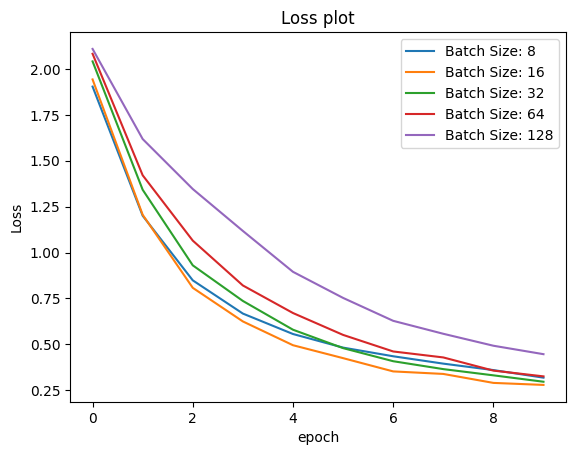

In [ ]:
####### plot the the training loss here #########

epochs = [i for i in range(num_epochs)]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

for batch_size in hyper_parameters["batch_size"]:
    plt.plot(epochs,train_loss_hyper_paramaters[f'b{batch_size}'],label=f'Batch Size: {batch_size}')

plt.legend()

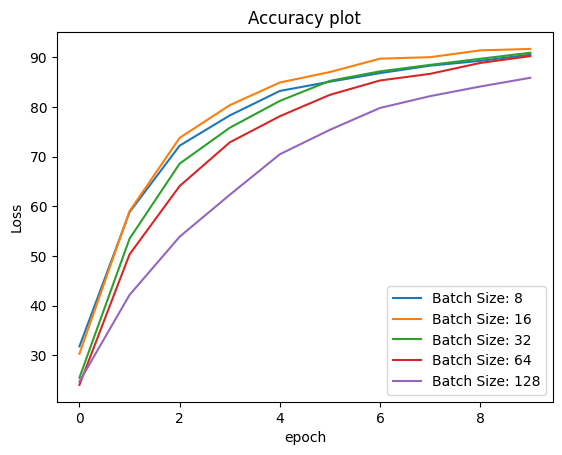

In [ ]:
####### plot the the training accuracies here #########

epochs = [i for i in range(num_epochs)]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Accuracy plot')

for batch_size in hyper_parameters["batch_size"]:
    plt.plot(epochs,train_acc_hyper_paramaters[f'b{batch_size}'],label=f'Batch Size: {batch_size}')

plt.legend()